In [55]:
import random

import matplotlib.finance as mpf
import matplotlib.pyplot as plt
import pandas
from matplotlib.dates import date2num

df = pandas.read_csv('DAT_MT_EURUSD_M1_201710.csv',
                     names=['date', 'time', 'o', 'h', 'l', 'c', 'v'],
                     parse_dates={'datetime': ['date', 'time']},
                     )  # type DataFrame
df.index = df['datetime']
df['d'] = df.index.map(date2num)

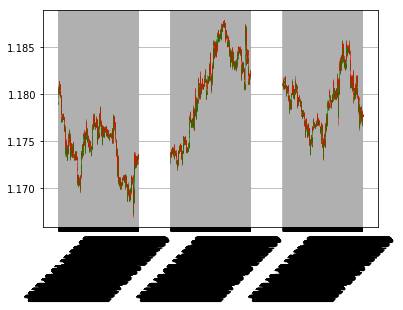

In [40]:
# df = df[-240:]
plt.grid()
plt.xticks(df['d'][::10], df.index[::10], rotation=45, size='small')
ax = plt.subplot()
# y軸のオフセット表示を無効にする。
ax.get_yaxis().get_major_formatter().set_useOffset(False)
data = df[['d', 'o', 'h', 'l', 'c']].values
# print(data)
# ローソク足は1日分の太さが1である。1日分の分足で割ってさらにその1/3の太さにする
wdth = 1.0 / (60 * 24) / 3
mpf.candlestick_ohlc(ax, data, width=wdth, colorup='g', colordown='r')
plt.show()

In [56]:
import numpy as np
from math import fabs

p_and_f = []

points = 0.0001
pips = 10
pivot = 2

buffer = 0
for idx, data in df.iterrows():
    diff = ((data['c'] - data['o']) / (pips * points))
    buffer += diff
#     print(buffer)
    if fabs(buffer) > 1:
        if len(p_and_f) == 0:
            p_and_f.append(int(buffer))
        else:
            if buffer > 0 and p_and_f[-1] > 0:
                p_and_f[len(p_and_f) - 1] += int(buffer)
                buffer = buffer % 1
            elif buffer < 0 and p_and_f[-1] < 0:
                p_and_f[len(p_and_f) - 1] += int(buffer)
                buffer = buffer % 1
            elif fabs(buffer) >= pivot:
                p_and_f.append(int(buffer))
                buffer = buffer % 1
#       print(buffer)
print(p_and_f)
        
        

[2, -5, 4, -2, 2, -2, 2, -3, 6, -2, 3, -2, 4, -3, 3, -4, 2, -3, 2, -3, 3, -2, 11, -2, 4, -2, 4, -2, 3, -2, 4, -2, 7, -4, 2, -3, 6, -4, 2, -4, 3, -2, 2, -2, 6, -2, 7, -2, 3, -3, 2, -2, 2, -3, 2, -2]


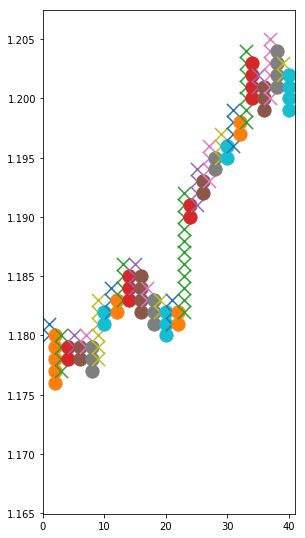

In [57]:
# https://stackoverflow.com/questions/8750648/point-and-figure-chart-with-matplotlib
import matplotlib.pyplot as plt

BOX = 0.001
START = 1.18
changes = p_and_f[0:40]

# one way to force dimensions is to set the figure size:
fig = plt.figure(figsize=(5, 10))

# another way is to control the axes dimensions
# for axes to have specific dimensions:
#                  [ x0,  y0,   w,   h]  in figure units, from 0 to 1
#ax = fig.add_axes([.15, .15, .7*.5, .7])
ax = fig.add_axes([.15, .15, .7, .7])

def sign(val):
    return val / abs(val)

pointChanges = []
for chg in changes:
    pointChanges += [sign(chg)] * abs(chg)

symbol = {-1:'o',
           1:'x'}

chgStart = START
for ichg, chg in enumerate(changes):
    x = [ichg+1] * abs(chg)
    y = [chgStart + i * BOX * sign(chg) for i in range(abs(chg))] 
    chgStart += BOX * sign(chg) * (abs(chg)-2)
    ax.scatter(x, y,
               marker=symbol[sign(chg)],
               s=175)   #<----- control size of scatter symbol

ax.set_xlim(0, len(changes)+1)
plt.show()